<a href="https://colab.research.google.com/github/ahatesham02/Artificial_Neural_Network-ANN-/blob/main/Bank_turnover_dataset_with_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [2]:
df= pd.read_csv('Churn_Modelling.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2259,2260,15762216,Barrera,686,France,Female,41,4,129553.76,2,1,0,187599.80,0
3573,3574,15791988,Chinomso,670,France,Male,68,4,0.00,2,1,1,11426.70,0
8140,8141,15572022,Han,605,France,Female,36,6,0.00,1,0,1,690.84,0
9116,9117,15672082,Schatz,562,France,Male,62,3,0.00,2,1,0,105986.01,0
3450,3451,15661936,Chikelu,513,France,Male,40,3,141004.46,1,1,0,105028.46,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.drop(['RowNumber','CustomerId','Surname'], axis='columns', inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [10]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

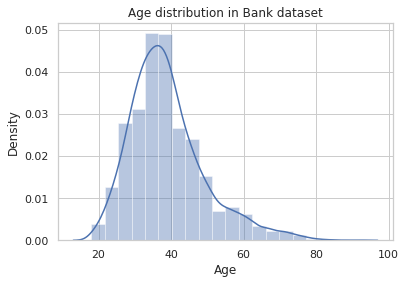

In [36]:
sns.distplot(df['Age'],bins=20 )
plt.title('Age distribution in Bank dataset')
plt.xlabel('Age')
plt.ylabel('Density')

In [22]:
for i in df:
  if df[i].dtype == 'object':

    print(i +':',df[i].unique())

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


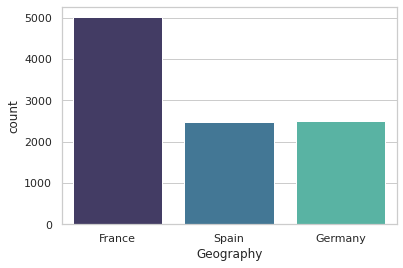

In [29]:
sns.countplot(df['Geography'], data=df, palette='mako')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


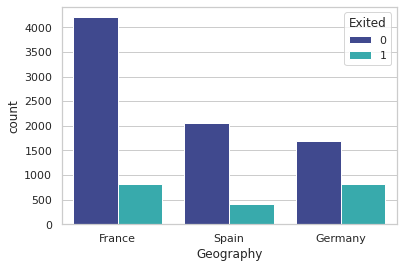

In [35]:
sns.countplot(df['Geography'],hue='Exited', data=df, palette='mako', saturation=1.0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


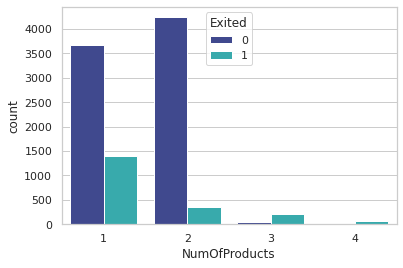

In [37]:
sns.countplot(df['NumOfProducts'], data=df, hue='Exited', palette='mako', saturation=1.00)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


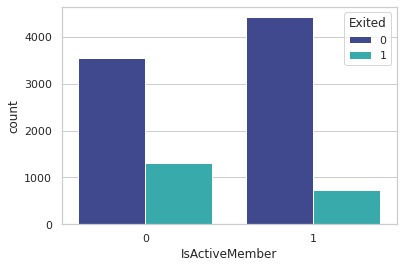

In [38]:
sns.countplot(df['IsActiveMember'], data=df, hue='Exited', palette='mako', saturation=1.00)

In [40]:
df['Gender'].replace({'Male':1,'Female':0}, inplace= True)

In [41]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [42]:
df1= pd.get_dummies(data= df, columns=['Geography'])
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [43]:
df1.drop(['Geography_Spain'], axis='columns', inplace=True)
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0


In [44]:
col_to_scale= ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
df1[col_to_scale]= scaler.fit_transform(df1[col_to_scale])

In [45]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany
0,0.538,0,0.324324,0.2,0.000000,1,1,1,0.506735,1,1,0
1,0.516,0,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,0
2,0.304,0,0.324324,0.8,0.636357,3,1,0,0.569654,1,1,0
3,0.698,0,0.283784,0.1,0.000000,2,0,0,0.469120,0,1,0
4,1.000,0,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,0


In [47]:
df1.shape

(10000, 12)

In [50]:
X= df1.drop(['Exited'], axis='columns')
y= df1['Exited']

In [51]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany
0,0.538,0,0.324324,0.2,0.000000,1,1,1,0.506735,1,0
1,0.516,0,0.310811,0.1,0.334031,1,0,1,0.562709,0,0
2,0.304,0,0.324324,0.8,0.636357,3,1,0,0.569654,1,0
3,0.698,0,0.283784,0.1,0.000000,2,0,0,0.469120,1,0
4,1.000,0,0.337838,0.2,0.500246,1,1,1,0.395400,0,0


In [52]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, x_test,y_train, y_test = train_test_split(X, y , test_size= 0.2, random_state= 32)

In [54]:
X_train.shape

(8000, 11)

In [59]:
y_train.shape

(8000,)

In [60]:
model = keras.Sequential([
                        keras.layers.Dense(100, input_shape=(11,), activation='relu'),
                        keras.layers.Dense(75, activation='relu'),
                        keras.layers.Dense(1, activation='sigmoid')

])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train, epochs=150)

Epoch 1/150
250/250 [==============================] - 1s 1ms/step - loss: 0.4909 - accuracy: 0.7986
Epoch 2/150
250/250 [==============================] - 0s 1ms/step - loss: 0.4107 - accuracy: 0.8270
Epoch 3/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3939 - accuracy: 0.8333
Epoch 4/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3852 - accuracy: 0.8343
Epoch 5/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3642 - accuracy: 0.8477
Epoch 6/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3550 - accuracy: 0.8561
Epoch 7/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3585 - accuracy: 0.8513
Epoch 8/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3431 - accuracy: 0.8562
Epoch 9/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3323 - accuracy: 0.8624
Epoch 10/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3330 - accura

In [61]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 976us/step - loss: 0.4477 - accuracy: 0.8225


[0.44774362444877625, 0.8224999904632568]

In [62]:
y_predicted= model.predict(x_test)

In [63]:
y_predicted[:10]

array([[0.00578904],
       [0.6623341 ],
       [0.11648759],
       [0.09722695],
       [0.01573694],
       [0.00683793],
       [0.0396159 ],
       [1.        ],
       [0.01192018],
       [0.0102694 ]], dtype=float32)

In [64]:
y_test[:10]

5097    0
2580    1
260     0
6781    0
5468    0
3977    0
2834    0
4014    1
6224    0
8001    0
Name: Exited, dtype: int64

In [65]:
y_pred=[]
for i in y_predicted:
  if i>= 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [66]:
y_pred[:10]

[0, 1, 0, 0, 0, 0, 0, 1, 0, 0]

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1583
           1       0.59      0.48      0.53       417

    accuracy                           0.82      2000
   macro avg       0.73      0.70      0.71      2000
weighted avg       0.81      0.82      0.82      2000



Text(0.5, 1.0, 'Confusion Matrix')

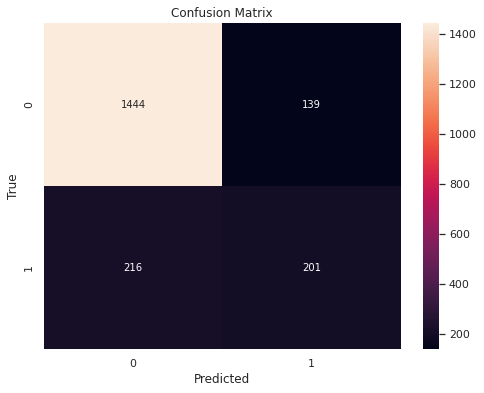

In [79]:
data= tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(data, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')